In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the dataset with two header rows (first row = Q1, Q2,etc  second row = full questions)
file_path = "kaggle_survey_2017_2021_clean.xlsx"
df = pd.read_excel(file_path, header=[0,1])

# Save the full questions (second header row) in a dictionary for reference
questions = dict(zip(df.columns.get_level_values(0), df.columns.get_level_values(1)))

# Use only the first-level headers (Q1, Q2, etc.) as column names for coding
df.columns = df.columns.get_level_values(0)

# Creating an ID column to keep track of the survey responses
df['ID'] = range(1, len(df) + 1)

# Reorder columns to put 'ID' before 'Year'
cols = df.columns.tolist()
cols.remove('ID')
year_index = cols.index('Year')
cols.insert(year_index, 'ID')
df = df[cols]


#Cleaing up the gender column
df['Q2'] = df['Q2'].replace({
    'Man': 'Male', 'Woman': 'Female',
    'Prefer not to say': 'Prefer not to say',
    'Prefer to self-describe': 'Prefer not to say',
    'Non-binary, genderqueer, or gender non-conforming': 'Nonbinary'})


# Cleaning up country names
df['Q3'] = df['Q3'].replace({
    'Viet Nam': 'Vietnam',
    'vietnam': 'Vietnam',
    'China': 'China',
    "People's Republic of China": 'China',
    'Republic of China': 'China',
    'Hong Kong': 'Hong Kong',
    'Hong Kong (S.A.R)': 'Hong Kong',
    'United States': 'United States',
    'United States of America': 'United States',
    'UK': 'United Kingdom',
    'Iran, Islamic Republic of...': 'Iran',
    'Iran': 'Iran',
    'South Korea': 'South Korea',
    'Republic of Korea': 'South Korea',
})

# Now df is ready for analysis using short headers like 'Q3', and you can use the 'questions' dict
# whenever you want to get the full question text, e.g. questions['Q3']


# Fixing the Degree column
df['Q4'] = df['Q4'].replace({
    "Master's degree": "Master’s degree", 
    "Masterâ€™s degree": "Master’s degree",
    "Bachelor's degree": "Bachelor’s degree",
    "Bachelorâ€™s degree": "Bachelor’s degree",
    "Some college/university study without earning a bachelorâ€™s degree": "Some college/university study without earning a bachelor's degree"
})

# Fixing the Q11 column for consistency
df['Q11'] = df['Q11'].replace({
    'A personal computer / desktop': 'Personal computer (laptop/desktop)',
    'A personal computer or laptop': 'Personal computer (laptop/desktop)',
    'Laptop': 'Personal computer (laptop/desktop)'
})





In [4]:
#Cleaning the Duration column + average completeion rate

# Rename the duration column for convenience
df.rename(columns={'Q0': 'completion_time_sec'}, inplace=True)

# Convert to numeric and drop rows with missing or invalid times
df['completion_time_sec'] = pd.to_numeric(df['completion_time_sec'], errors='coerce')
df = df[df['completion_time_sec'].notna()]  # Remove rows with no time (not completed)

# Remove extreme outliers (>150,000 seconds)
df = df[df['completion_time_sec'] <= 150000]

# Remove unreasonably fast completions (<2 minutes)
df = df[df['completion_time_sec'] >= 120]

# Final average calculation
avg_minutes = df['completion_time_sec'].mean() / 60
print(f"Cleaned dataset shape: {df.shape}")
print(f"Average completion time: {avg_minutes:.2f} minutes")


Cleaned dataset shape: (83349, 294)
Average completion time: 51.98 minutes


In [5]:
#Age analysis

age_col = 'Q1'

# Drop missing values
df = df[df[age_col].notna()]

# Get the mode (most common age group)
most_common_age_group = df[age_col].mode()[0]

print(f"The most common age group is: {most_common_age_group}")

The most common age group is: 25-29


The most common gender is: Male
Gender distribution:
Q2
Male                 67023
Female               14872
Prefer not to say     1322
Nonbinary              132
Name: count, dtype: int64


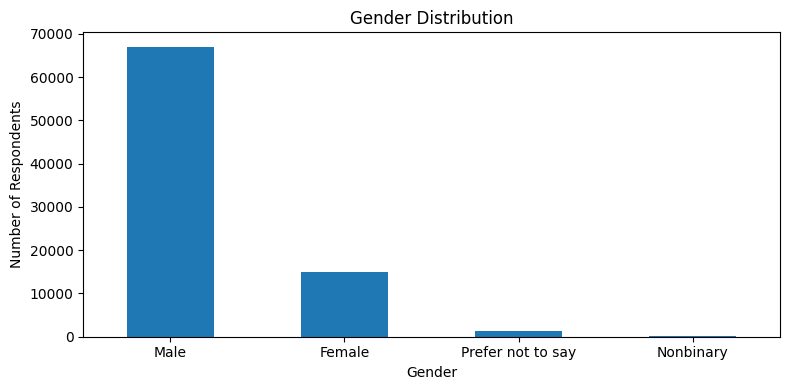

In [6]:
#Gender analysis

most_common_gender = df['Q2'].mode()[0]
print(f"The most common gender is: {most_common_gender}")

gender_counts = df['Q2'].value_counts()

print("Gender distribution:")
print(gender_counts)

import matplotlib.pyplot as plt

gender_counts.plot(kind='bar', title='Gender Distribution', figsize=(8, 4))
plt.xlabel('Gender')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Country distribution:
Q3
India            21340
United States    11645
Other             4415
China             3142
Brazil            2745
                 ...  
Ecuador             50
Kazakhstan          44
Uganda              44
Ethiopia            43
Iraq                43
Name: count, Length: 68, dtype: int64
The most common country is: India


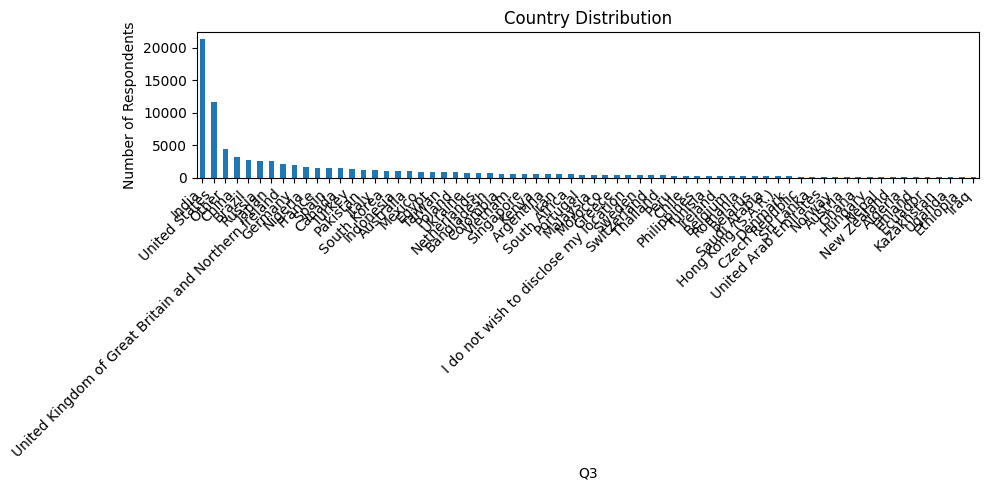

In [7]:
#Country analysis


country_counts = df['Q3'].value_counts()
print("Country distribution:")
print(country_counts)

#most common country
most_common_country = df['Q3'].mode()[0]
print(f"The most common country is: {most_common_country}")


country_counts.plot(kind='bar', title='Country Distribution', figsize=(10, 5))
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Degree distribution:
Q4
Master’s degree                                                      35179
Bachelor’s degree                                                    28263
Doctoral degree                                                      10555
Some college/university study without earning a bachelor's degree     4329
Professional degree                                                   1774
I prefer not to answer                                                1557
No formal education past high school                                  1003
Professional doctorate                                                 354
Name: count, dtype: int64
The most common degree is: Master’s degree


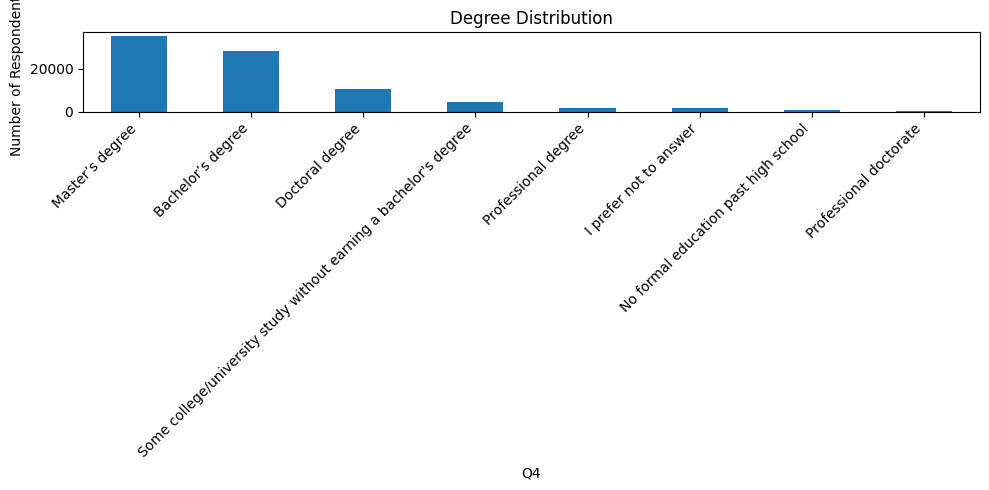

In [8]:
# Degree analysis

degree_counts = df['Q4'].value_counts()
print("Degree distribution:")
print(degree_counts)

# Most common degree
most_common_degree = df['Q4'].mode()[0]
print(f"The most common degree is: {most_common_degree}")

degree_counts.plot(kind='bar', title='Degree Distribution', figsize=(10, 5))
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Job title distribution:
Q5
Student                         20024
Data Scientist                  13673
Software Engineer                9669
Data Analyst                     6900
Other                            6828
Research Scientist               5074
Currently not employed           3522
Business Analyst                 3151
Machine Learning Engineer        2515
Data Engineer                    2340
Product/Project Manager          1729
Not employed                     1667
Statistician                     1096
Program/Project Manager           834
Consultant                        745
DBA/Database Engineer             574
Manager                           560
Research Assistant                560
Chief Officer                     335
Product Manager                   316
Developer Advocate                110
Marketing Analyst                 109
Developer Relations/Advocacy       98
Principal Investigator             91
Salesperson                        90
Data Journalist        

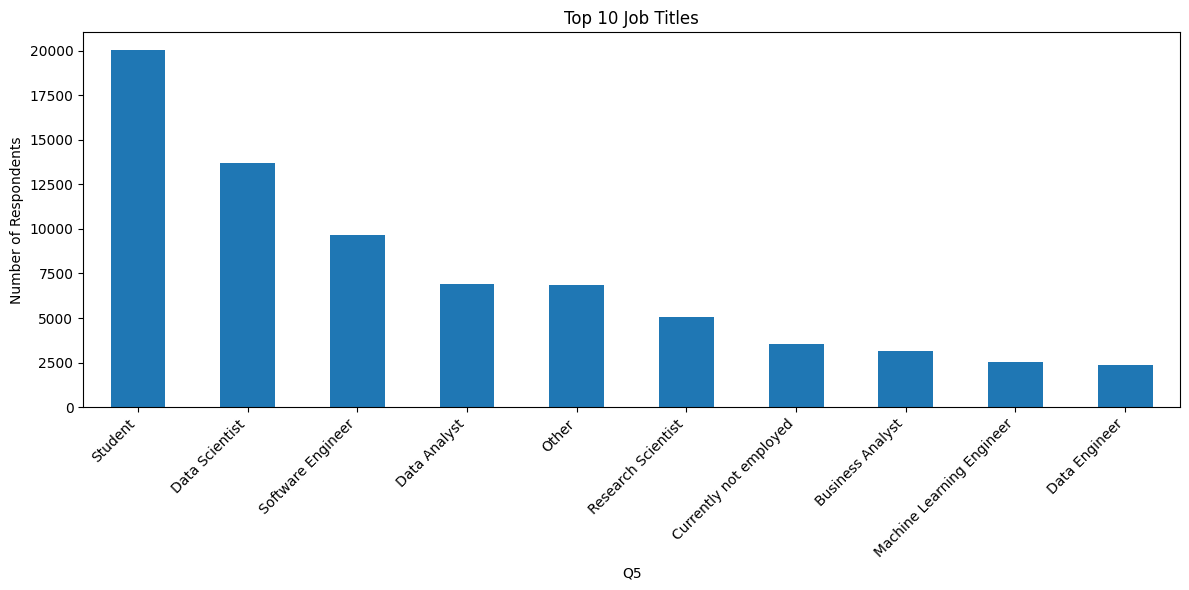

In [9]:
# Job title analysis

job_title_counts = df['Q5'].value_counts()
print("Job title distribution:")
print(job_title_counts)

# Most common job title
most_common_job = df['Q5'].mode()[0]
print(f"The most common job title is: {most_common_job}")

# If there are too many unique titles, plot only the top 10
top_n = 10
job_title_counts.head(top_n).plot(kind='bar', title=f'Top {top_n} Job Titles', figsize=(12, 6))
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Unique programming experience categories:
['5-10 years' '20+ years' '1-3 years' '< 1 years' '3-5 years'
 '10-20 years' 'I have never written code' '1-2 years' nan
 'I have never written code but I want to learn' '< 1 year' '20-30 years'
 '30-40 years' 'I have never written code and I do not want to learn'
 '40+ years']
Programming experience distribution:
Q6
3-5 years                                               15477
1-2 years                                               13385
< 1 years                                               12655
5-10 years                                               9386
1-3 years                                                7742
10-20 years                                              5867
< 1 year                                                 4367
20+ years                                                3653
I have never written code                                2872
I have never written code but I want to learn             796
20-30 years        

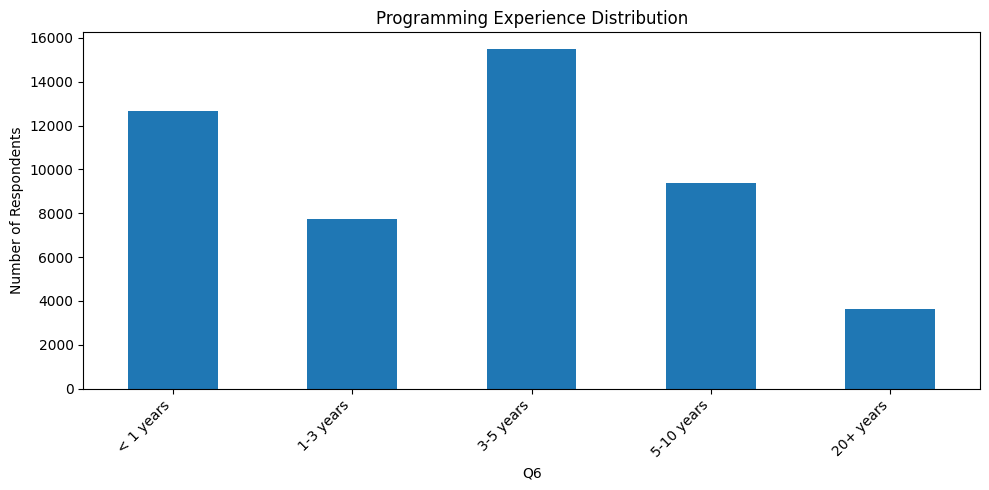

In [10]:
# First, clean/standardize Q6 values (remove extra spaces, lowercase optional)
df['Q6'] = df['Q6'].str.strip()

# Check unique values to spot any inconsistencies
print("Unique programming experience categories:")
print(df['Q6'].unique())

# Count how many respondents in each category
experience_counts = df['Q6'].value_counts()
print("Programming experience distribution:")
print(experience_counts)

# Most common experience category
most_common_experience = df['Q6'].mode()[0]
print(f"The most common programming experience is: {most_common_experience}")


order = ['< 1 years', '1-3 years', '3-5 years', '5-10 years', '20+ years']
df['Q6'] = pd.Categorical(df['Q6'], categories=order, ordered=True)

experience_counts_sorted = df['Q6'].value_counts().reindex(order)
experience_counts_sorted.plot(kind='bar', title='Programming Experience Distribution', figsize=(10,5))
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Python        63930
SQL           32137
R             20282
Java          13961
JavaScript    12396
C++           11318
C              9435
MATLAB         9015
Bash           8442
Other          6119
Julia           771
Swift           429
None              0
dtype: int64


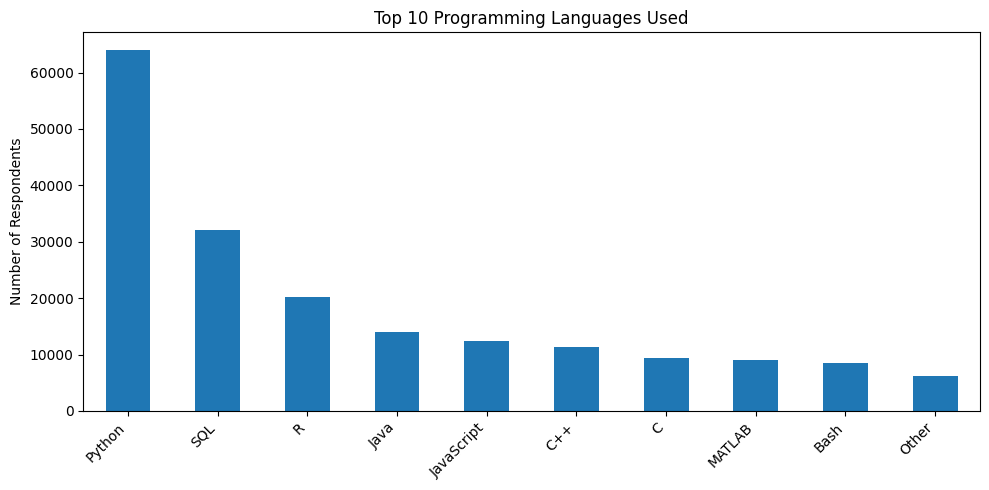

In [11]:
#Identifying Q7 language columns


#defining the columns for programming languages names
q7_label_map = {
    'Q7_Part_1': 'Python',
    'Q7_Part_2': 'R',
    'Q7_Part_3': 'SQL',
    'Q7_Part_4': 'C',
    'Q7_Part_5': 'C++',
    'Q7_Part_6': 'Java',
    'Q7_Part_7': 'JavaScript',
    'Q7_Part_8': 'Julia',
    'Q7_Part_9': 'Swift',
    'Q7_Part_10': 'Bash',
    'Q7_Part_11': 'MATLAB',
    'Q7_Part_12': 'None',
    'Q7_OTHER': 'Other'
}

q7_cols = list(q7_label_map.keys())
q7_bool = df[q7_cols].notna()

# Get value counts
language_counts = q7_bool.sum().sort_values(ascending=False)


# Replace index using the label map (but keep original DataFrame untouched)
language_counts_display = language_counts.rename(index=q7_label_map)

print(language_counts_display)


language_counts_display.head(10).plot(
    kind='bar',
    title='Top 10 Programming Languages Used',
    figsize=(10, 5)
)
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Recommended first programming language for aspiring data scientists:
Q8
Python        58123
R              6221
SQL            3812
C++            1261
C               876
MATLAB          801
Java            675
Other           587
Javascript      325
Julia           250
Bash             96
Scala            70
SAS              67
VBA              36
Swift            32
Go               25
TypeScript        5
Name: count, dtype: int64

Most commonly recommended language: Python


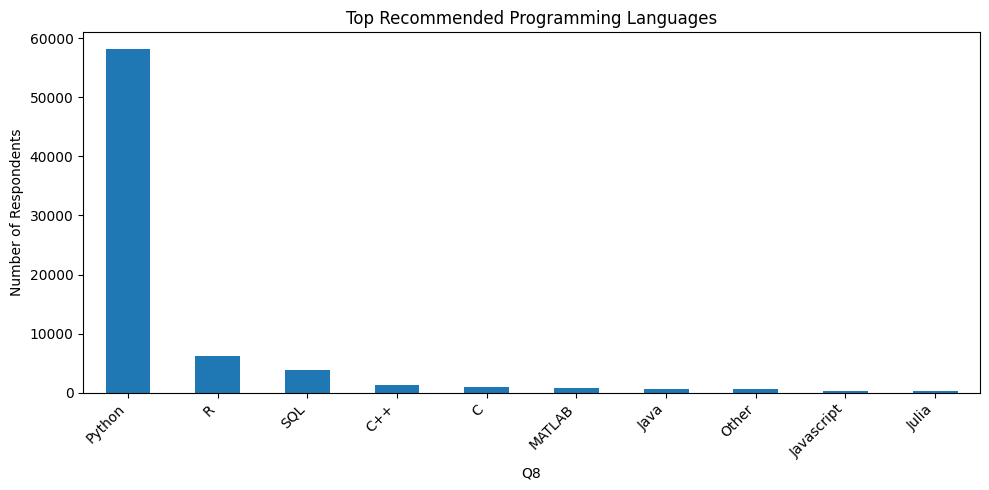

In [12]:
#Q8 recommended Language

df['Q8'] = df['Q8'].str.strip()

# Count how many times each language was recommended
recommended_lang_counts = df['Q8'].value_counts()

print("Recommended first programming language for aspiring data scientists:")
print(recommended_lang_counts)

# Most commonly recommended language
most_common_recommendation = df['Q8'].mode()[0]
print(f"\nMost commonly recommended language: {most_common_recommendation}")

# Plot the top 10 recommendations
import matplotlib.pyplot as plt

recommended_lang_counts.head(10).plot(kind='bar', title='Top Recommended Programming Languages', figsize=(10, 5))
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Number of languages selected (distribution):
num_languages_selected
0     10719
1     17645
2     21839
3     17302
4      8819
5      4153
6      1741
7       732
8       262
9        96
10       20
11       17
12        4
Name: count, dtype: int64


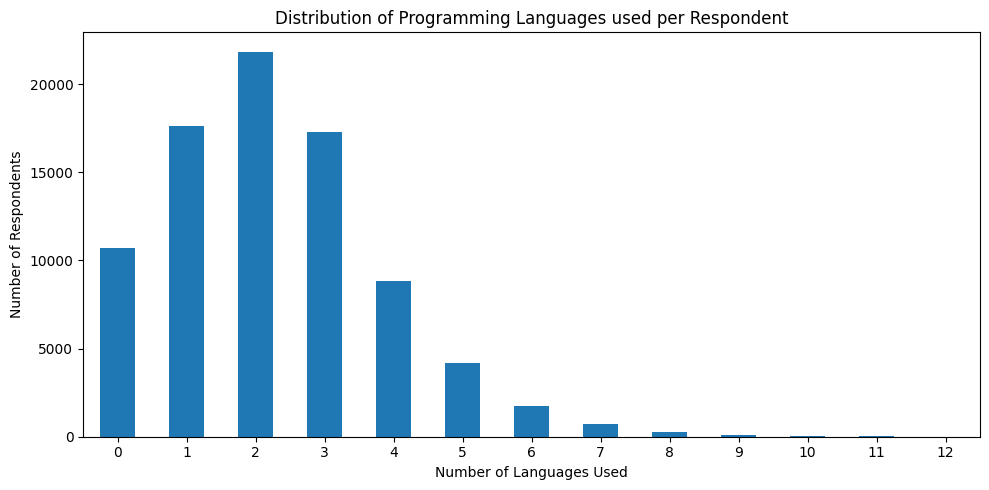


Top 10 respondents who use the most programming languages:
          ID  num_languages_selected
33733  33734                      12
37621  37622                      12
22813  22814                      12
13432  13433                      12
21096  21097                      11
20300  20301                      11
1273    1274                      11
10973  10974                      11
20379  20380                      11
22740  22741                      11


In [13]:
#Identify Q7 language columns
q7_cols = [col for col in df.columns if col.startswith('Q7_Part_') or col == 'Q7_OTHER']

#Create a boolean DataFrame (True if language selected, False otherwise)
q7_bool = df[q7_cols].notna()

#Count number of languages each respondent selected
df['num_languages_selected'] = q7_bool.sum(axis=1)

#Distribution of number of languages known
lang_dist = df['num_languages_selected'].value_counts().sort_index()
print("Number of languages selected (distribution):")
print(lang_dist)


lang_dist.plot(kind='bar', title='Distribution of Programming Languages used per Respondent', figsize=(10,5))
plt.xlabel('Number of Languages Used')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#Top 10 users who selected the most languages
top_users = df[['ID', 'num_languages_selected']].sort_values(by='num_languages_selected', ascending=False).head(10)
print("\nTop 10 respondents who use the most programming languages:")
print(top_users)


Number of IDEs selected (distribution):
num_IDEs_selected
0     13899
1     19042
2     19636
3     14557
4      8171
5      4363
6      2182
7       990
8       381
9       122
10        6
Name: count, dtype: int64


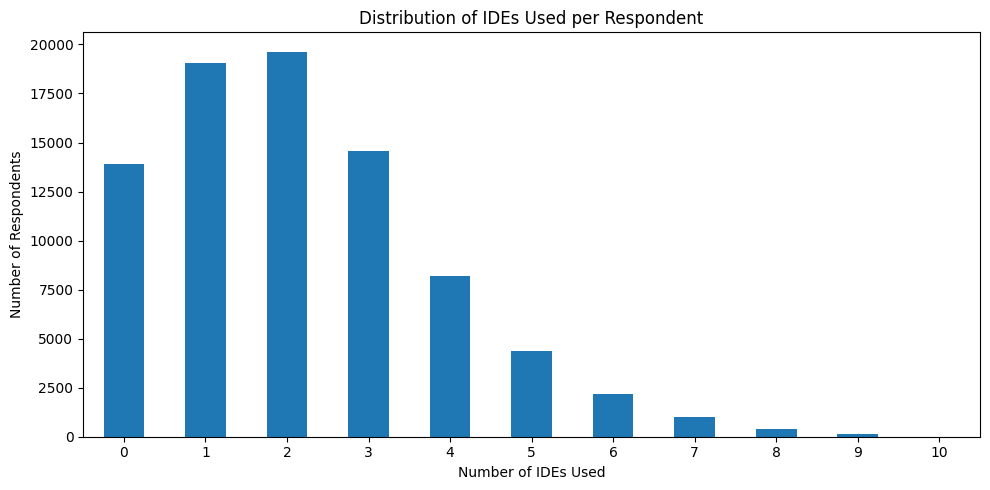


Top 10 respondents who use the most IDEs:
          ID  num_IDEs_selected
17028  17029                 10
31678  31679                 10
69266  69267                 10
84007  84008                 10
69746  69747                 10
71751  71752                 10
74749  74750                  9
78616  78617                  9
71588  71589                  9
19394  19395                  9

IDE usage counts:
RStudio             40164
Visual Studio       26328
Jupyter Notebook    22988
PyCharm             20940
Sublime Text        17572
Spyder              15058
Vim / Emacs         13491
Atom                10836
Notepad++            8874
Other (Text)         4461
Other                   0
dtype: int64


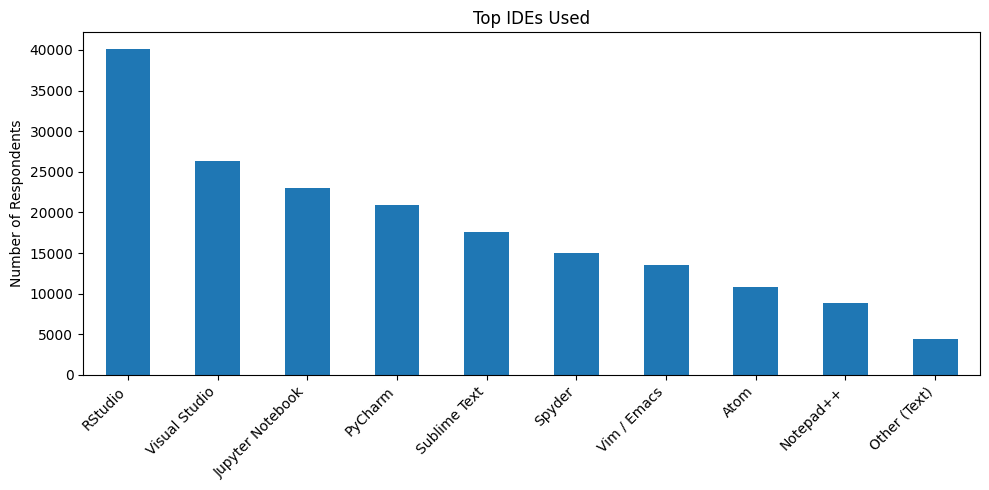

In [14]:
# Identifying Q9 IDE columns


# Step 1: Identify Q9 IDE columns
q9_cols = [col for col in df.columns if col.startswith('Q9_Part_') or col == 'Q9_OTHER']

# Step 2: Create a boolean DataFrame (True if IDE selected)
q9_bool = df[q9_cols].notna()

# Step 3: Count number of IDEs each respondent selected
df['num_IDEs_selected'] = q9_bool.sum(axis=1)

# Step 4: Distribution of number of IDEs selected
ide_dist = df['num_IDEs_selected'].value_counts().sort_index()
print("Number of IDEs selected (distribution):")
print(ide_dist)

# Optional: plot distribution
import matplotlib.pyplot as plt

ide_dist.plot(kind='bar', title='Distribution of IDEs Used per Respondent', figsize=(10,5))
plt.xlabel('Number of IDEs Used')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Step 5: Top 10 respondents using the most IDEs
top_ide_users = df[['ID', 'num_IDEs_selected']].sort_values(by='num_IDEs_selected', ascending=False).head(10)
print("\nTop 10 respondents who use the most IDEs:")
print(top_ide_users)

# Count each IDE's total usage
ide_counts = df[q9_cols].apply(pd.Series.value_counts).loc['RStudio'].fillna(0).sort_values(ascending=False)

# Alternative if you want all values (not just RStudio): count non-NaNs
ide_counts = df[q9_cols].notna().sum().sort_values(ascending=False)

# Map Q9 column names to actual IDE names (customize as needed)
ide_names = {
    'Q9_Part_1': 'RStudio',
    'Q9_Part_2': 'PyCharm',
    'Q9_Part_3': 'Visual Studio',
    'Q9_Part_4': 'Visual Studio Code',
    'Q9_Part_5': 'Jupyter Notebook',
    'Q9_Part_6': 'Spyder',
    'Q9_Part_7': 'Sublime Text',
    'Q9_Part_8': 'Vim / Emacs',
    'Q9_Part_9': 'Notepad++',
    'Q9_Part_10': 'Atom',
    'Q9_Part_11': 'Eclipse',
    'Q9_Part_12': 'Other',
    'Q9_OTHER': 'Other (Text)',
}

# Rename index for output
ide_counts_named = ide_counts.rename(index=ide_names)
print("\nIDE usage counts:")
print(ide_counts_named)

# Plot top 10 IDEs
ide_counts_named.head(10).plot(kind='bar', title='Top IDEs Used', figsize=(10,5))
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Number of users per hosted notebook platform:

                                            Platform  User Count
0                                   Kaggle Notebooks       25671
1                                    Colab Notebooks       23576
4                                Binder / JupyterHub       10129
10                              Google Cloud Datalab        4200
2                                    Azure Notebooks        3971
9   Google Cloud Notebooks (AI Platform / Vertex AI)        3187
6                                  IBM Watson Studio        2530
13                                             Other        2292
7                  Amazon Sagemaker Studio Notebooks        1961
3                              Paperspace / Gradient         972
11                Databricks Collaborative Notebooks         966
8                               Amazon EMR Notebooks         581
5                                         Code Ocean         347
12                                         

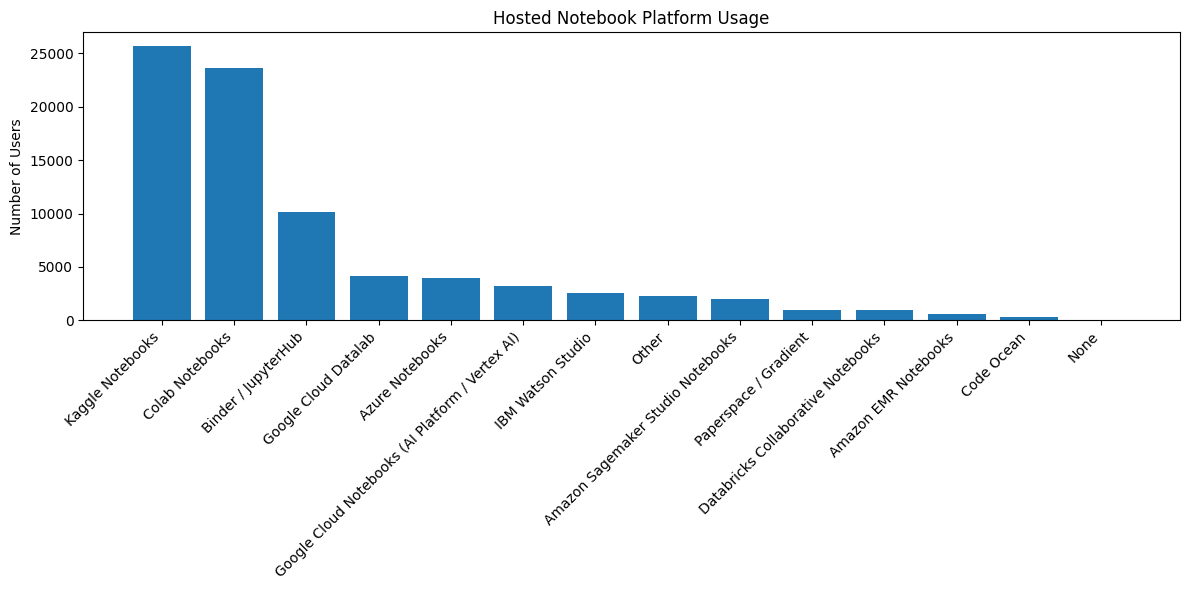


Top 10 users who use the most hosted notebook platforms:

User ID 17029 uses 13 platforms.
User ID 13433 uses 13 platforms.
User ID 16081 uses 13 platforms.
User ID 29713 uses 13 platforms.
User ID 22741 uses 12 platforms.
User ID 3282 uses 12 platforms.
User ID 7498 uses 12 platforms.
User ID 8218 uses 12 platforms.
User ID 41408 uses 12 platforms.
User ID 150 uses 12 platforms.


In [15]:
# Step 1: Get Q10 columns
q10_columns = [col for col in df.columns if col.startswith('Q10_Part') or col == 'Q10_OTHER']

# Step 2: Clean labels from questions dictionary
q10_clean_labels = {
    col: questions[col].split(" - ")[-1].strip()
    for col in q10_columns
}

# Step 3: Count users per platform (how many selected each one)
import pandas as pd
platform_counts = {
    q10_clean_labels[col]: df[col].notna().sum()
    for col in q10_columns
}

# Convert to DataFrame for plotting and sorting
q10_usage_df = pd.DataFrame(list(platform_counts.items()), columns=['Platform', 'User Count'])
q10_usage_df = q10_usage_df.sort_values(by='User Count', ascending=False)

print("Number of users per hosted notebook platform:\n")
print(q10_usage_df)


plt.figure(figsize=(12,6))
plt.bar(q10_usage_df['Platform'], q10_usage_df['User Count'])
plt.title('Hosted Notebook Platform Usage')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Step 4: Count how many platforms each user uses
df['Q10_platform_count'] = df[q10_columns].notna().sum(axis=1)

# List of platforms per user
df['Q10_platforms_used'] = df[q10_columns].apply(
    lambda row: [q10_clean_labels[col] for col in q10_columns if pd.notna(row[col])],
    axis=1
)

# Step 5: Top 10 users who use the most platforms
top_users = df[['ID', 'Q10_platform_count', 'Q10_platforms_used']]\
    .sort_values(by='Q10_platform_count', ascending=False)\
    .head(10)

print("\nTop 10 users who use the most hosted notebook platforms:\n")
for idx, row in top_users.iterrows():
    print(f"User ID {row['ID']} uses {row['Q10_platform_count']} platforms.")


Most commonly used computing platforms:
Q11
Personal computer (laptop/desktop)                                     17881
A laptop                                                               15949
A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)     4567
A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)               1611
Other                                                                    354
Name: count, dtype: int64

The most commonly used platform is: Personal computer (laptop/desktop)


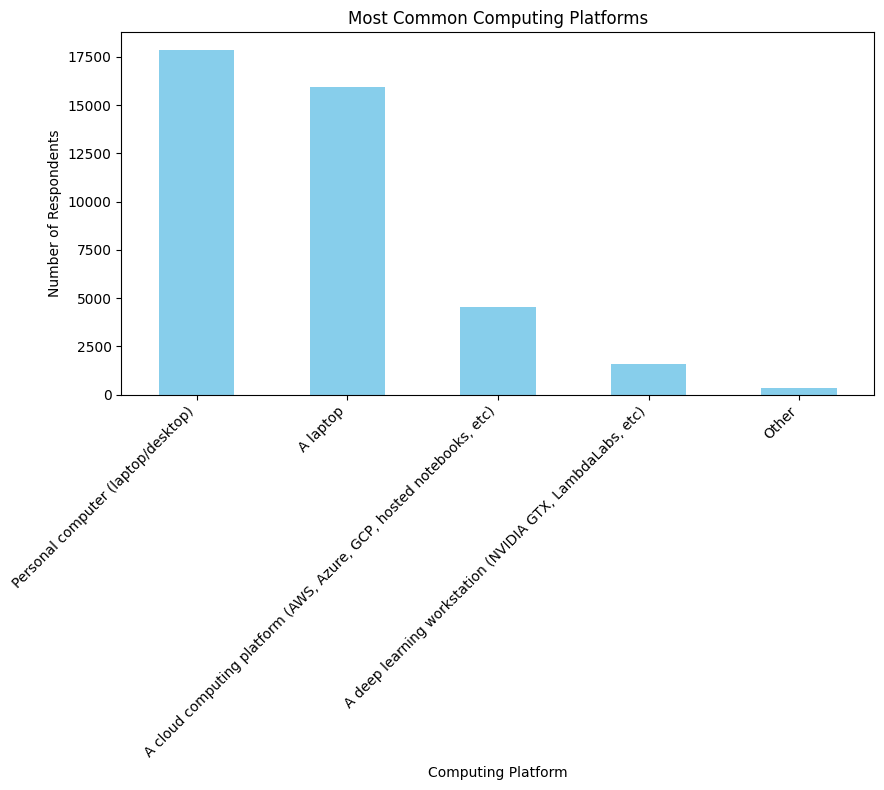

In [16]:
#Q11 


df['Q11'] = df['Q11'].str.strip()

# Count the occurrences of each platform
platform_counts = df['Q11'].value_counts()
print("Most commonly used computing platforms:")
print(platform_counts)

# Most common platform
most_common_platform = df['Q11'].mode()[0]
print(f"\nThe most commonly used platform is: {most_common_platform}")

# Plot the distribution
import matplotlib.pyplot as plt

platform_counts.plot(kind='bar', title='Most Common Computing Platforms', figsize=(9, 8), color='skyblue')
plt.ylabel('Number of Respondents')
plt.xlabel('Computing Platform')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Most commonly used specialized hardware:
GPUs                    14545
CPUs                    10155
 NVIDIA GPUs             7879
 Google Cloud TPUs       3383
None / I do not know     2372
Other                    1614
TPUs                     1413
Name: count, dtype: int64


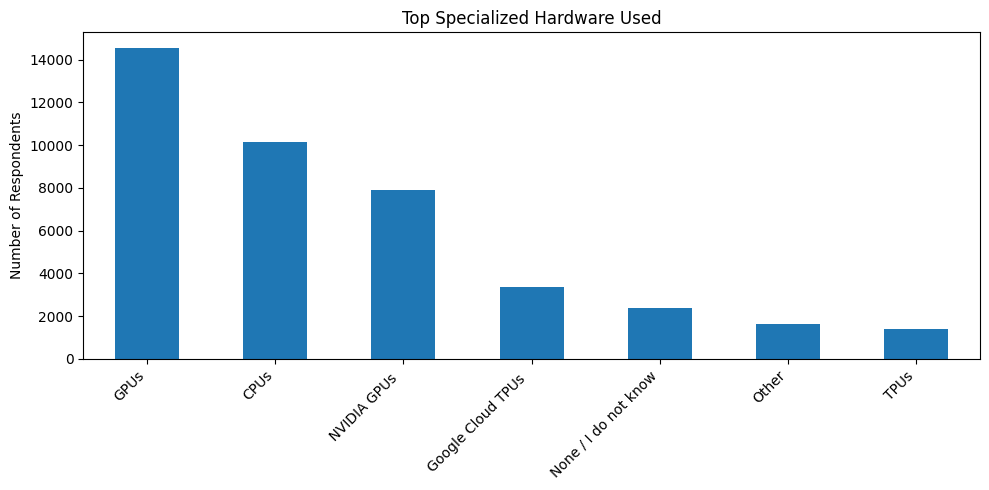

In [17]:
# Step 1: Get all Q12-related columns
q12_cols = [col for col in df.columns if col.startswith('Q12')]

# Step 2: Stack all responses into one Series
hardware_responses = df[q12_cols].stack().dropna()

# Step 3: Count frequency of each hardware type
hardware_counts = hardware_responses.value_counts()

# Step 4: Show results
print("Most commonly used specialized hardware:")
print(hardware_counts)

# Step 5: Plot top 10
hardware_counts.head(10).plot(kind='bar', figsize=(10, 5), title='Top Specialized Hardware Used')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


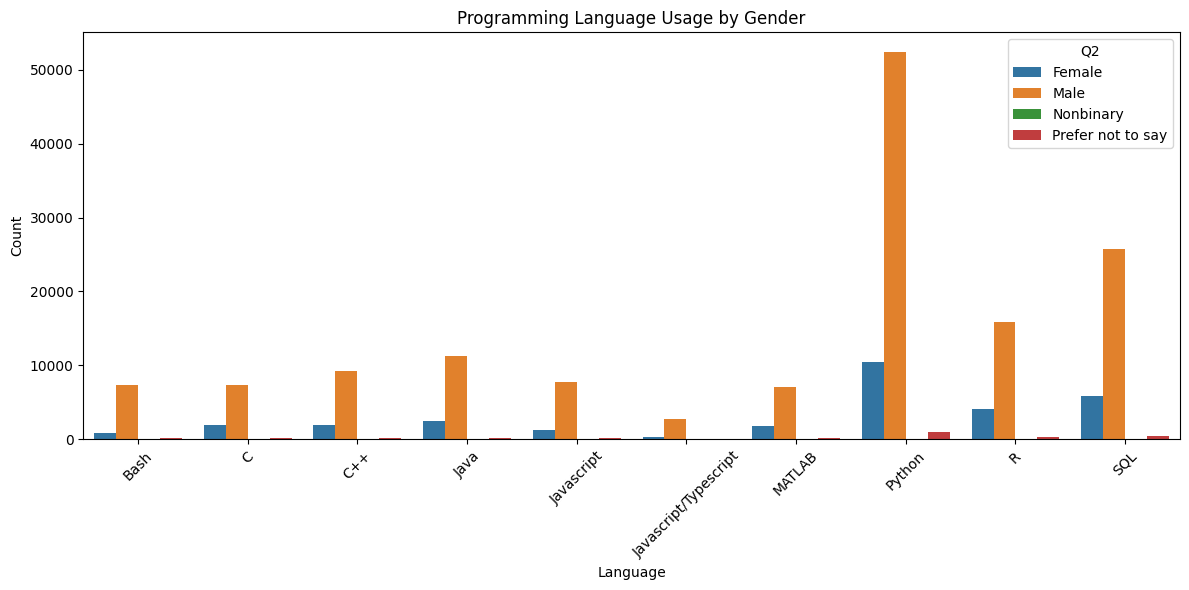

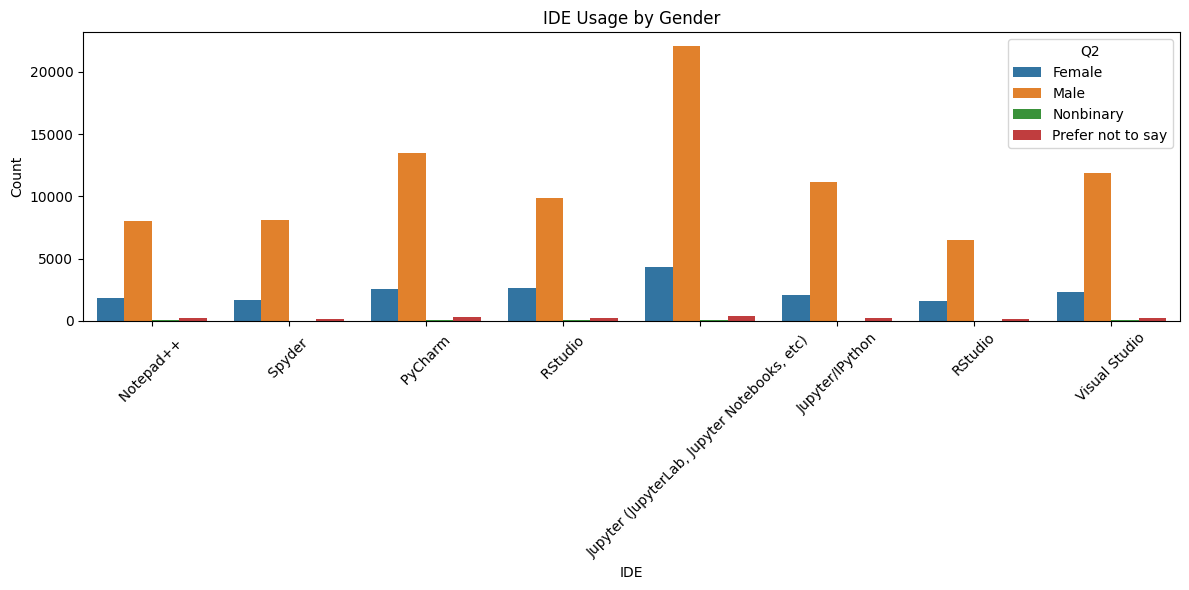

In [ ]:
#Programming Languages Used by Gender (Q7 vs Q2)

# All Q7 language columns
q7_cols = [col for col in df.columns if col.startswith('Q7_Part')]

# Melt Q7 columns to long format with Gender
q7_melted = df.melt(id_vars='Q2', value_vars=q7_cols, var_name='Language_Col', value_name='Language')

# Drop nulls
q7_melted = q7_melted.dropna()

# Group by language and gender
lang_gender_counts = q7_melted.groupby(['Language', 'Q2']).size().reset_index(name='Count')

# Plot top 10 languages by gender
top_languages = lang_gender_counts.groupby('Language')['Count'].sum().nlargest(10).index
lang_gender_top10 = lang_gender_counts[lang_gender_counts['Language'].isin(top_languages)]

plt.figure(figsize=(12, 6))
sns.barplot(data=lang_gender_top10, x='Language', y='Count', hue='Q2')
plt.title('Programming Language Usage by Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# All Q9 IDE columns
q9_cols = [col for col in df.columns if col.startswith('Q9_Part')]

# Melt
q9_melted = df.melt(id_vars='Q2', value_vars=q9_cols, var_name='IDE_Col', value_name='IDE')
q9_melted = q9_melted.dropna()

# Group
ide_gender_counts = q9_melted.groupby(['IDE', 'Q2']).size().reset_index(name='Count')

# Top 8 IDEs
top_ides = ide_gender_counts.groupby('IDE')['Count'].sum().nlargest(8).index
ide_gender_top8 = ide_gender_counts[ide_gender_counts['IDE'].isin(top_ides)]

plt.figure(figsize=(12, 6))
sns.barplot(data=ide_gender_top8, x='IDE', y='Count', hue='Q2')
plt.title('IDE Usage by Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


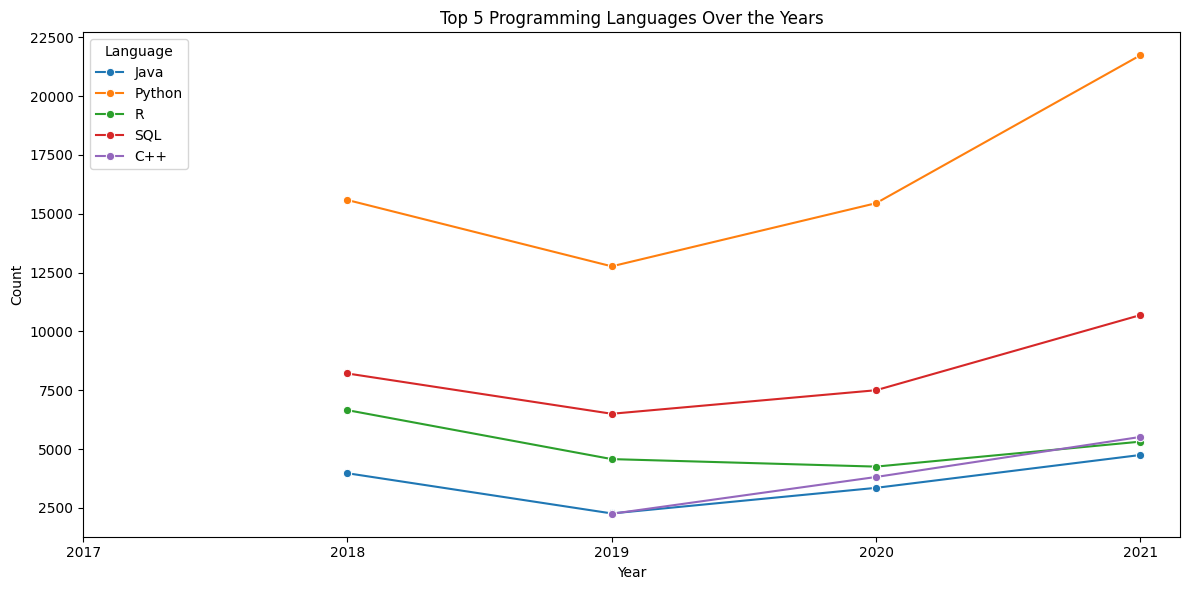

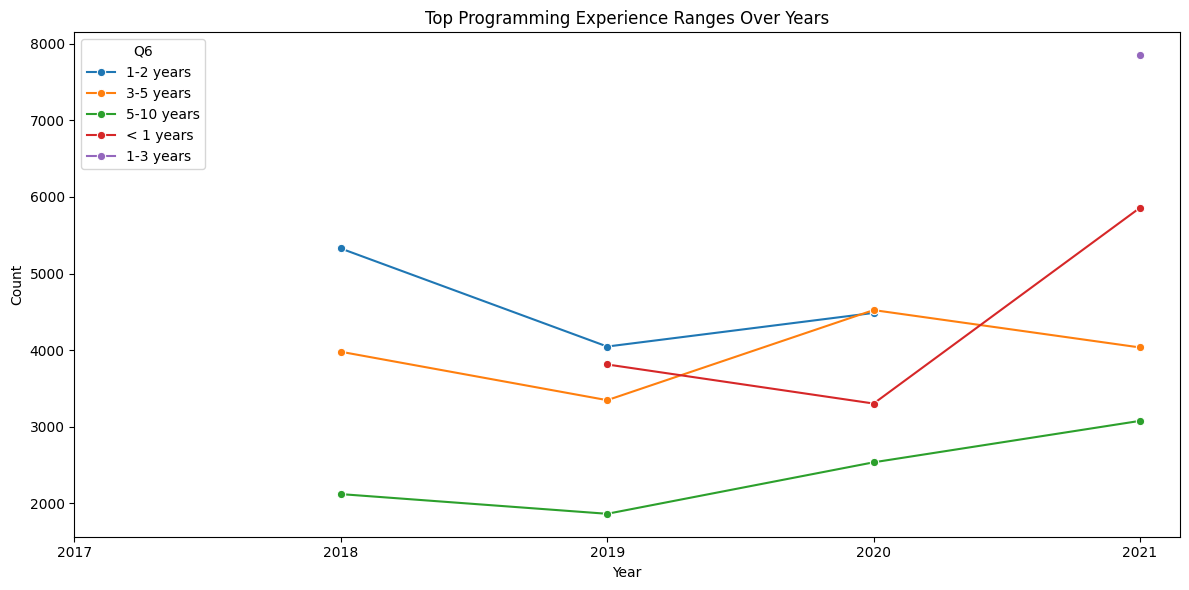

In [ ]:
#Due to limited questions in the 2017 Kaggle survey, some analyses (e.g., tool and language trends) begin from 2018 onwards.
df['Year'] = df['Year'].astype(int)

# Melt Q7 by Year
q7_year_melted = df.melt(id_vars='Year', value_vars=q7_cols, var_name='Language_Col', value_name='Language')
q7_year_melted = q7_year_melted.dropna()

# Group and filter top 5
lang_year_counts = q7_year_melted.groupby(['Year', 'Language']).size().reset_index(name='Count')
top_5_langs = lang_year_counts.groupby('Language')['Count'].sum().nlargest(5).index
lang_year_top5 = lang_year_counts[lang_year_counts['Language'].isin(top_5_langs)]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=lang_year_top5, x='Year', y='Count', hue='Language', marker='o', sort=False)
plt.title('Top 5 Programming Languages Over the Years')
plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.tight_layout()
plt.show()

exp_year = df.groupby(['Year', 'Q6']).size().reset_index(name='Count')
top_exps = exp_year.groupby('Q6')['Count'].sum().nlargest(5).index
exp_year_top = exp_year[exp_year['Q6'].isin(top_exps)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=exp_year_top, x='Year', y='Count', hue='Q6', marker='o', sort=False)
plt.title('Top Programming Experience Ranges Over Years')
plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.tight_layout()
plt.show()


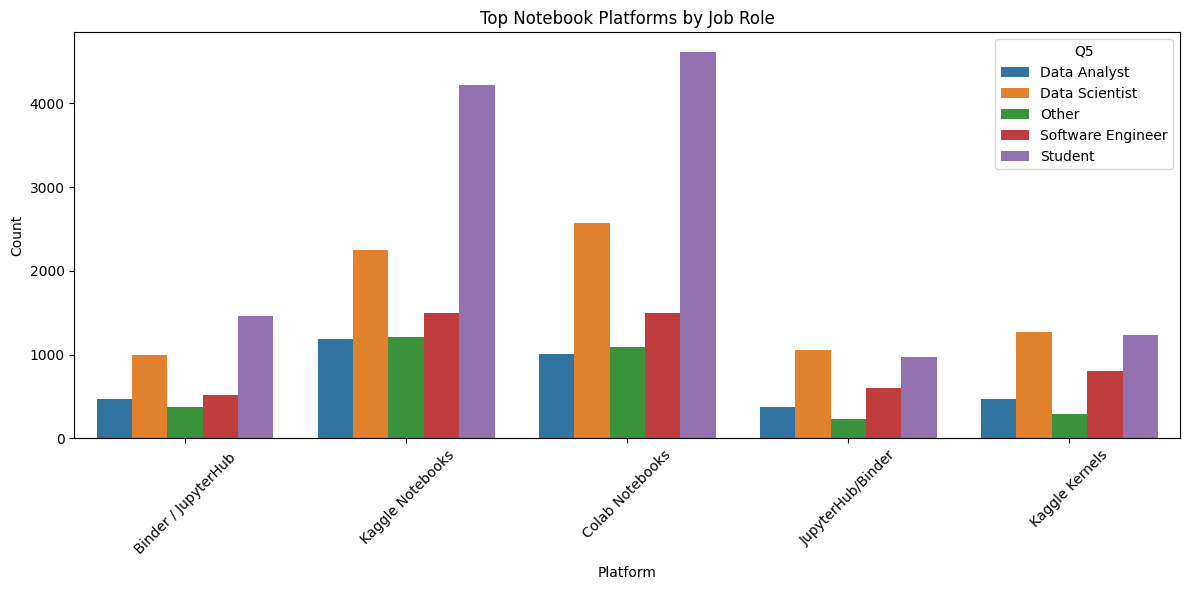

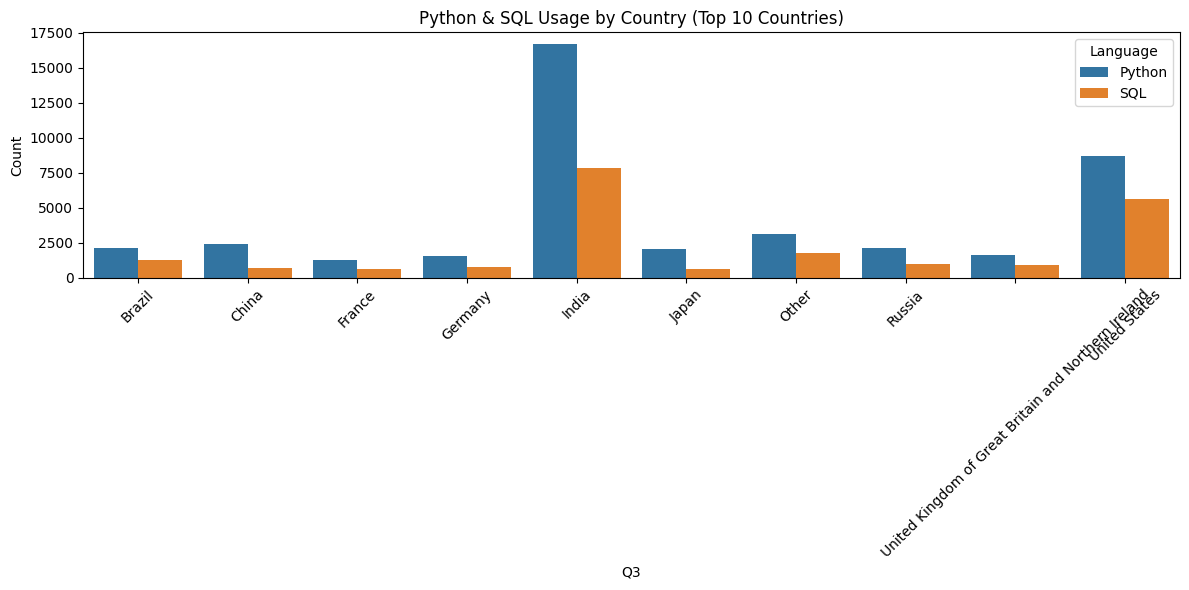

C:\Users\Hussein\AppData\Local\Temp\ipykernel_5552\2482722987.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exp_tooldiv = df.groupby('Q6')['Language_Count'].mean().reset_index()


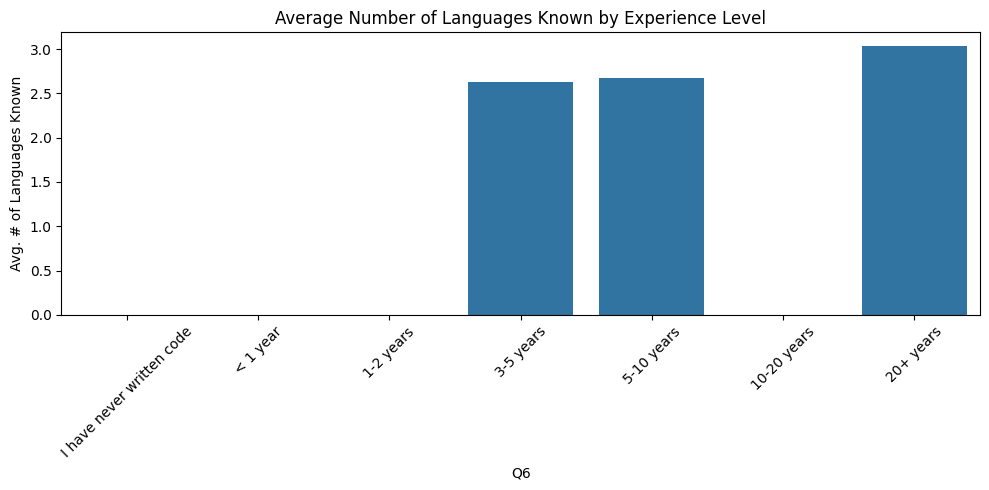

In [20]:
#Correlations Between Variables
#We'll implement 3 sub-analyses:


# Q10 columns (hosted notebook tools)
q10_cols = [col for col in df.columns if col.startswith('Q10_Part')]

# Melt Q10 to long format with Job Role (Q5)
q10_melted = df.melt(id_vars='Q5', value_vars=q10_cols, var_name='Platform_Col', value_name='Platform')
q10_melted = q10_melted.dropna()

# Group by platform and job
platform_job_counts = q10_melted.groupby(['Platform', 'Q5']).size().reset_index(name='Count')

# Filter for top 5 platforms and top 5 roles
top_platforms = platform_job_counts.groupby('Platform')['Count'].sum().nlargest(5).index
top_roles = platform_job_counts.groupby('Q5')['Count'].sum().nlargest(5).index
filtered = platform_job_counts[platform_job_counts['Platform'].isin(top_platforms) & platform_job_counts['Q5'].isin(top_roles)]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered, x='Platform', y='Count', hue='Q5')
plt.title('Top Notebook Platforms by Job Role')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Melt Q7 (languages) with Q3 (country)
q7_country_melted = df.melt(id_vars='Q3', value_vars=q7_cols, var_name='Lang_Col', value_name='Language')
q7_country_melted = q7_country_melted.dropna()

# Focus on Python & SQL only
filtered_lang = q7_country_melted[q7_country_melted['Language'].isin(['Python', 'SQL'])]

# Group
country_lang_counts = filtered_lang.groupby(['Q3', 'Language']).size().reset_index(name='Count')

# Top 10 countries
top_countries = country_lang_counts.groupby('Q3')['Count'].sum().nlargest(10).index
final = country_lang_counts[country_lang_counts['Q3'].isin(top_countries)]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=final, x='Q3', y='Count', hue='Language')
plt.title('Python & SQL Usage by Country (Top 10 Countries)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Count how many languages each respondent knows
df['Language_Count'] = df[q7_cols].notnull().sum(axis=1)

# Group by experience
exp_tooldiv = df.groupby('Q6')['Language_Count'].mean().reset_index()

# Clean and sort Q6 experience order manually (for better visualization)
exp_order = [
    'I have never written code',
    '< 1 year', '1-2 years', '3-5 years',
    '5-10 years', '10-20 years', '20+ years'
]
exp_tooldiv = exp_tooldiv[exp_tooldiv['Q6'].isin(exp_order)].sort_values(by='Q6', key=lambda x: x.map({k:i for i,k in enumerate(exp_order)}))

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=exp_tooldiv, x='Q6', y='Language_Count', order=exp_order)
plt.title('Average Number of Languages Known by Experience Level')
plt.xticks(rotation=45)
plt.ylabel('Avg. # of Languages Known')
plt.tight_layout()
plt.show()



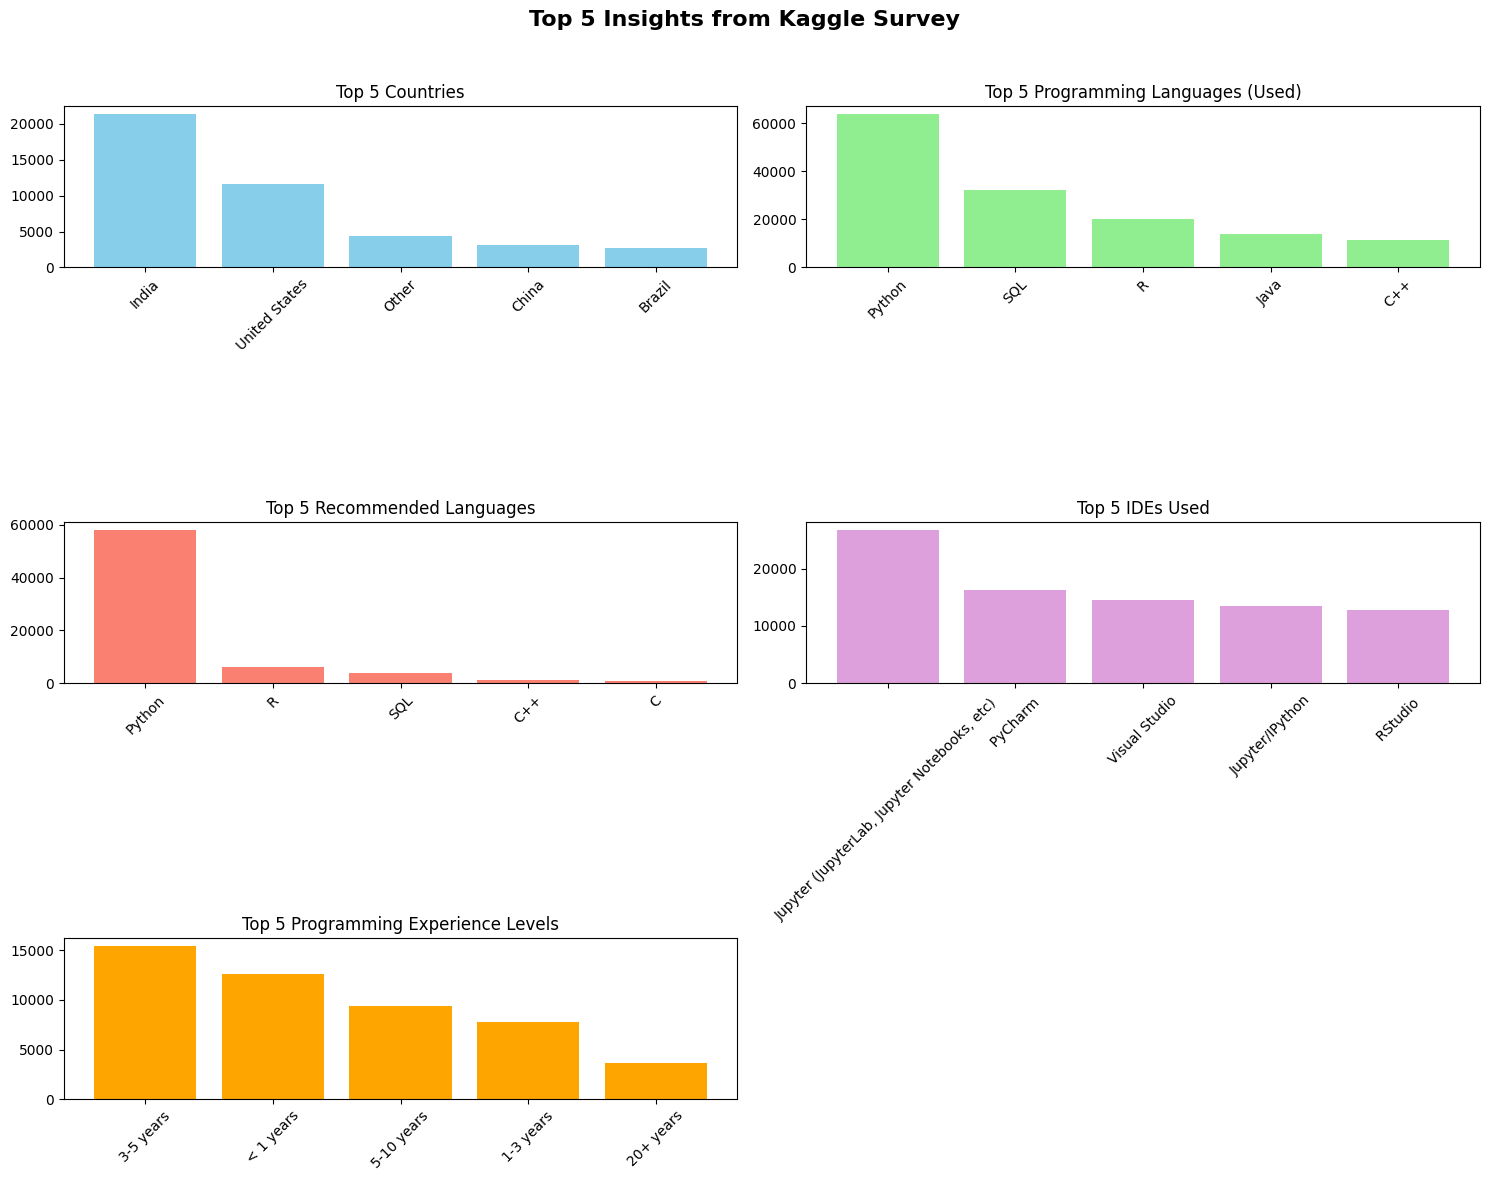

In [21]:
#1 Most Common Countries 
country_counts = df['Q3'].value_counts().head(5)

#2 Most Used Programming Languages (Q7)
q7_cols = [col for col in df.columns if 'Q7_Part_' in col]
language_counts = df[q7_cols].apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False).head(5)

#3 Most Recommended Language (Q8)
recommended_counts = df['Q8'].value_counts().head(5)

#4 Most Used IDEs (Q9)
q9_cols = [col for col in df.columns if 'Q9_Part_' in col]
ide_counts = df[q9_cols].apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False).head(5)

#5 Programming Experience Distribution (Q6)
experience_counts = df['Q6'].value_counts().head(5)

#Dashboard
fig, axs = plt.subplots(3, 2, figsize=(15, 12))
axs = axs.flatten()

# Chart 1
axs[0].bar(country_counts.index, country_counts.values, color='skyblue')
axs[0].set_title("Top 5 Countries")
axs[0].tick_params(axis='x', rotation=45)

# Chart 2
axs[1].bar(language_counts.index, language_counts.values, color='lightgreen')
axs[1].set_title("Top 5 Programming Languages (Used)")
axs[1].tick_params(axis='x', rotation=45)

# Chart 3
axs[2].bar(recommended_counts.index, recommended_counts.values, color='salmon')
axs[2].set_title("Top 5 Recommended Languages")
axs[2].tick_params(axis='x', rotation=45)

# Chart 4
axs[3].bar(ide_counts.index, ide_counts.values, color='plum')
axs[3].set_title("Top 5 IDEs Used")
axs[3].tick_params(axis='x', rotation=45)

# Chart 5
axs[4].bar(experience_counts.index, experience_counts.values, color='orange')
axs[4].set_title("Top 5 Programming Experience Levels")
axs[4].tick_params(axis='x', rotation=45)
fig.delaxes(axs[5])

plt.suptitle("Top 5 Insights from Kaggle Survey", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
